# Handling Missing Data

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename
    date_col: specify a date_col to use for index_col
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file,
    index_col=date_col,
    parse_dates=[date_col])
    return df

## Plots DF:

The function **plot_dfs()** takes two dataframes: the original (df1) with no missing values, and the imputed (df2) to compare against. The function creates multiple time series subplots using the specified response column (col). 

*Note that the imputed dataframe will contain additional columns (a column for the output of each imputation technique), and the plotting function accomodates this fact.*

In [4]:
def plot_dfs(df1:pd.DataFrame, df2:pd.DataFrame, col:str, title=None, xlabel=None, ylabel=None):
    '''
    df1: original datafram without missing data
    df2: dataframe with missing data
    col: column that constains missing data 
    '''
    df_missing = df2.rename(columns={col:'missing'})
    columns = df_missing.loc[:,'missing':].columns.to_list()
    subplots_size = len(columns)
    fig, ax = plt.subplots(subplots_size+1,1,sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title
    
    df1[col].plot(ax=ax[0],figsize=(10,12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()

## RMSE Score

Additional to a visual comparisson, is also useful to have technique to compare numerically (using statiscal measure)

In [5]:
def rmse_score(df1:pd.DataFrame, df2:pd.DataFrame, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.to_list()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col]-df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

## Understanding missing data

Generally missing data is quite common, yet sometimes it is not given the proper level of attention in terms of formulating a stategy on how to handle the situation. One approach is to drop the missing values, however this may not be a good strategy if you have limited data in the first place. Additionally the drawback is that you might not be able to discover the reason of why that data is missing. 

A second approach may involve tagging the rows with missing data by adding a columns describing or labelling the missing data. For example, suposse you know that there was a power outage on a particular day. In that case, you can add Power Outage to label the missing data and differentiate it fom other missing data labeled with Missing Data if the cause is unknown.

A third approach is estimating the missing data values. The methods can range from simple and naive to more complex techniques leveraging machine learning and complex models. 

To be able to meassure the accuracy of the estimated values, there are different options and measure to consider, and the answer is not simple. In this notebook we will use the **RMSE**. 

In [6]:
clicks_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_missing.csv'
co2_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_missing.csv'

In [7]:
co2_df = pd.read_csv(co2_url,
                    index_col='year',
                    parse_dates=True
                    )

clicks_df = pd.read_csv(clicks_url,
                        index_col='date',
                        parse_dates=True
                        )

In [8]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2008-04-01 to 2008-08-13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     135 non-null    float64
 1   location  135 non-null    int64  
 2   clicks    119 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.2 KB


## Handling missing data with univariate imputation using pandas

Some basic univariate imputation techniques include the following:
- Imputating using the mean.
- Imputing using the last observation forward (forward fill). This can be referred to as **Last Observation Carried Forward (LOCF)**
- Imputing using the next observation backward (backward fill). This can be referred to as **Next Observation Carried Backward (NOCB)**

In [9]:
clicks_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_original.csv'
clicks_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_missing.csv'

co2_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_original.csv'
co2_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_missing.csv'

In [10]:
co2_original = pd.read_csv(co2_or_url)
co2_missing = pd.read_csv(co2_ms_url)
clicks_original = pd.read_csv(clicks_or_url)
clicks_missing = pd.read_csv(clicks_ms_url)

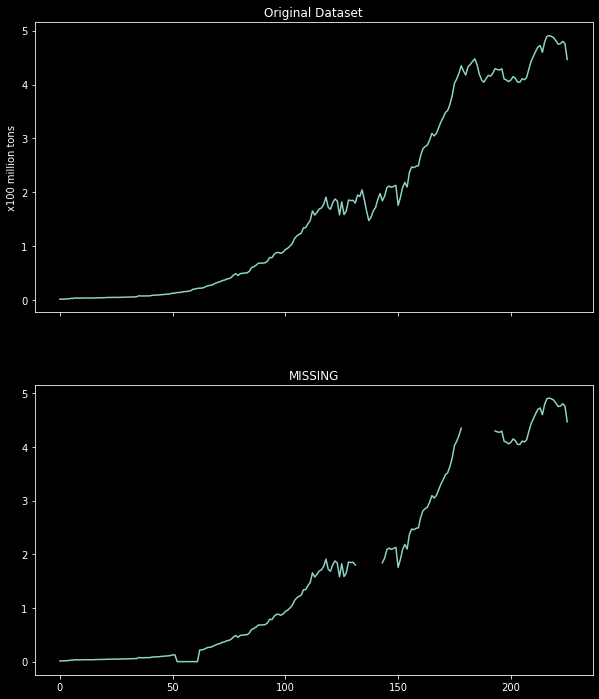

In [11]:
plot_dfs(co2_original,
            co2_missing,
            'co2',
            title="Annual CO2 Emission per Capita",
            xlabel="Years",
            ylabel="x100 million tons")

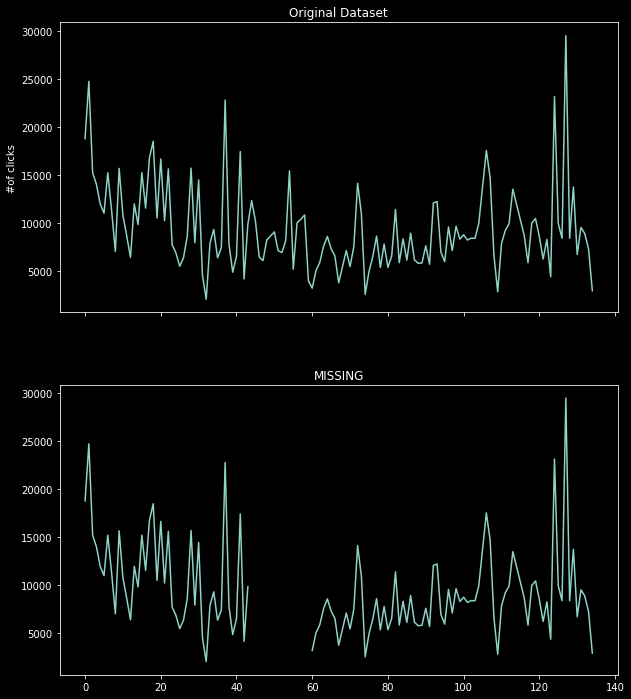

In [12]:
plot_dfs(clicks_original,
            clicks_missing,
            'clicks',
            title="Page Clicks per Day",
            xlabel="date",
            ylabel="#of clicks")

In [13]:
clicks_missing[clicks_missing['clicks'].isna()]

,date,price,location,clicks
44,5/15/08,42.517755,2,NaN
45,5/16/08,44.011009,2,NaN
46,5/17/08,42.530303,2,NaN
47,5/18/08,42.565698,5,NaN
48,5/19/08,43.892996,2,NaN
49,5/20/08,43.247706,2,NaN
50,5/21/08,44.106289,1,NaN
51,5/22/08,43.810714,1,NaN
52,5/23/08,43.620802,1,NaN
53,5/24/08,43.854031,2,NaN


In [14]:
co2_missing['ffil'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())

In [15]:
_ = rmse_score(co2_original,
co2_missing,
'co2')

RMSE for ffil: 0.06789677289762384
RMSE for bfill: 0.06489337203839292
RMSE for mean: 0.6642188275341351


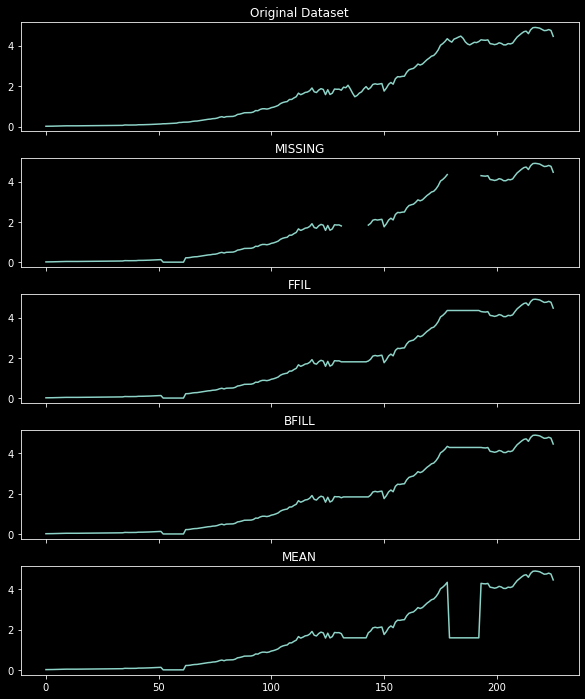

In [16]:
plot_dfs(co2_original, co2_missing, 'co2')

In [17]:
clicks_missing['ffil'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

In [18]:
_ = rmse_score(clicks_original,
clicks_missing,
'clicks')

RMSE for ffil: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


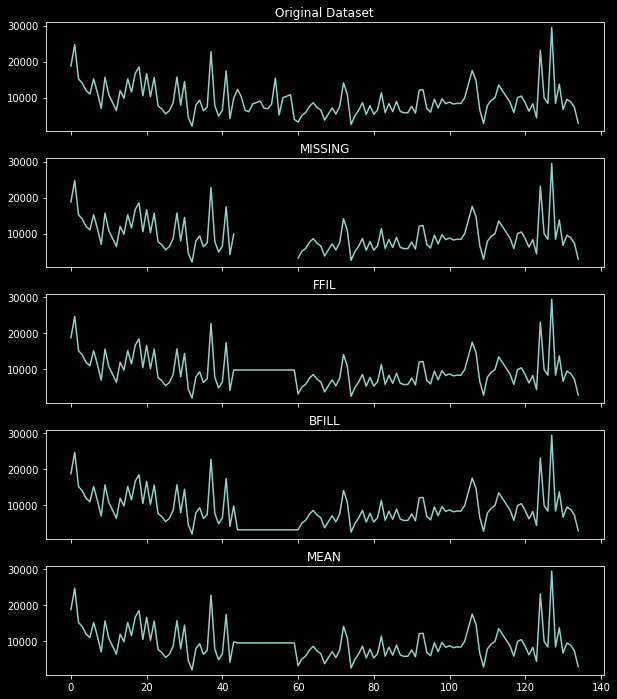

In [19]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## Handling missing data with univariate imputation using scikit-learn

In [21]:
from sklearn.impute import SimpleImputer

clicks_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_original.csv'
clicks_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_missing.csv'

co2_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_original.csv'
co2_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_missing.csv'

co2_original = pd.read_csv(co2_or_url)
co2_missing = pd.read_csv(co2_ms_url)
clicks_original = pd.read_csv(clicks_or_url)
clicks_missing = pd.read_csv(clicks_ms_url)

In [22]:
strategy = [('Mean Strategy', 'mean'),
            ('Median Strategy', 'median'),
            ('Most Frequent Strategy', 'most_frequent')]

co2_vals = co2_missing['co2'].values.reshape(-1,1)
clicks_vals = clicks_missing['clicks'].values.reshape(-1,1)
for s_name, s in strategy:
    co2_missing[s_name] = (SimpleImputer(strategy=s).fit_transform(co2_vals))
    clicks_missing[s_name] = (SimpleImputer(strategy=s).fit_transform(clicks_vals))

In [23]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for Mean Strategy: 0.6642188275341351
RMSE for Median Strategy: 0.8463375334528024
RMSE for Most Frequent Strategy: 1.1285178854727376


In [24]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for Mean Strategy: 997.7600138929953
RMSE for Median Strategy: 959.3580492530756
RMSE for Most Frequent Strategy: 1097.6425985146868


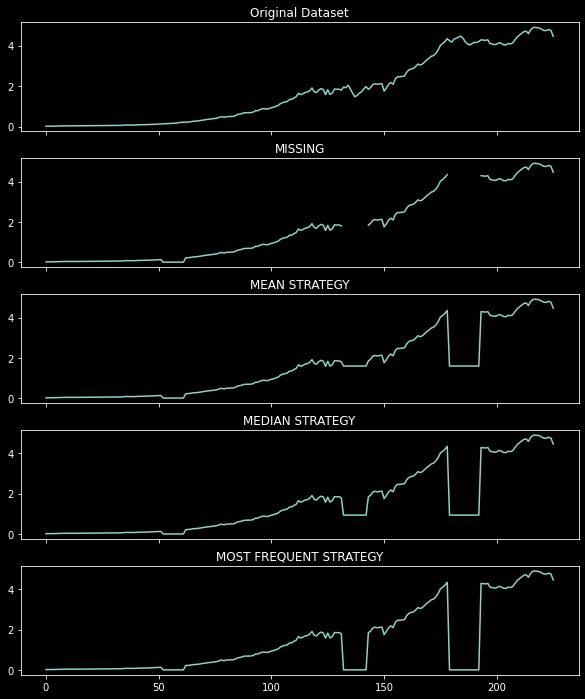

In [25]:
plot_dfs(co2_original, co2_missing, 'co2')

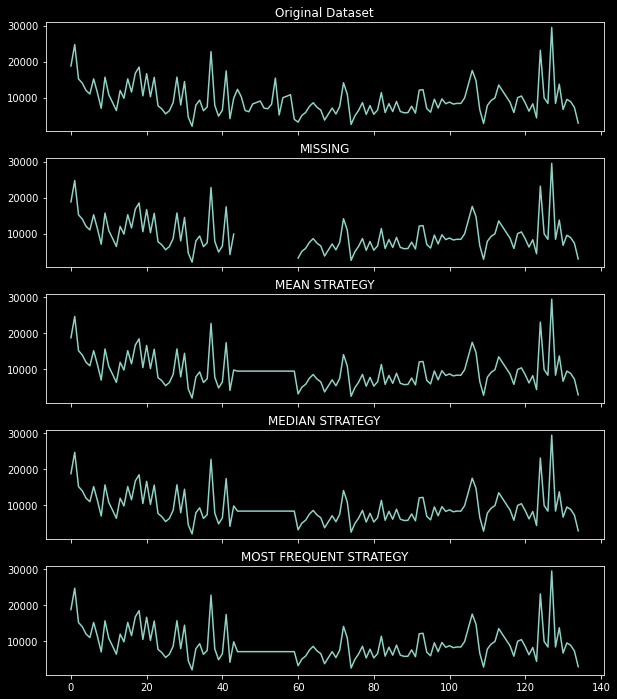

In [26]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## Handling missing data with multivariate imputation

Instead of using a single variable (column), in a multivariate imputation, the method uses multiple variables within the dataset to impute missing values. The idea is simple: Have more variables within the dataset chime in to improve the predictability of missing values. 

In [30]:
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import ExtraTreesRegressor,BaggingRegressor
from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.neighbors import KNeighborsRegressor

clicks_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_original.csv'
clicks_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_missing.csv'

co2_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_original.csv'
co2_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_missing.csv'

co2_original = pd.read_csv(co2_or_url)
co2_missing = pd.read_csv(co2_ms_url)
clicks_original = pd.read_csv(clicks_or_url)
clicks_missing = pd.read_csv(clicks_ms_url)

With IterativeImputer you can test different estimators. So, let's try different regressors and compare the results. Create a list of the regressors to be use in the **IterativeImputer**

In [32]:
estimators = [('extra_trees', ExtraTreesRegressor(n_estimators=10)),
                ('bagging', BaggingRegressor(n_estimators=10)),
                ('elastic_net', ElasticNet()),
                ('linear_regression', LinearRegression()),
                ('knn', KNeighborsRegressor(n_neighbors=3))]

In [37]:
clicks_vals = clicks_missing.iloc[:,1:4].values
for e_name, e in estimators:
    est = IterativeImputer(random_state=15,estimator=e).fit(clicks_vals)
    clicks_missing[e_name] = est.transform(clicks_vals)[:, 2]

/mnt/c/Users/bcavagnaroo/OneDrive/Learning/DS_ML/TimeSeriesAnalisis_Python/python_timeseries/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/mnt/c/Users/bcavagnaroo/OneDrive/Learning/DS_ML/TimeSeriesAnalisis_Python/python_timeseries/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [38]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for extra_trees: 1643.6289871523338
RMSE for bagging: 1161.3484971901958
RMSE for elastic_net: 945.40752093431
RMSE for linear_regression: 938.9419831427184
RMSE for knn: 1336.8798392251822


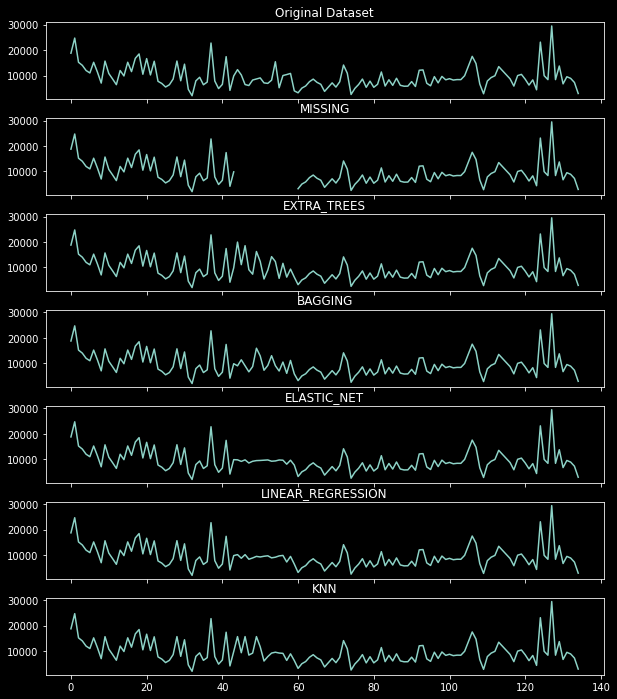

In [39]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## MICE

In [40]:
from statsmodels.imputation.mice import MICE, MICEData,MICEResults
import statsmodels.api as sm

In [41]:
fltr = ['price', 'location','clicks']
mice_data = MICEData(clicks_missing[fltr],perturbation_method='gaussian')
# 20 iterations
mice_data.update_all(n_iter=20)
mice_data.set_imputer('clicks', formula='~ price + location',model_class=sm.OLS)

In [42]:
clicks_missing['MICE'] = mice_data.data['clicks'].values.tolist()
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for extra_trees: 1643.6289871523338
RMSE for bagging: 1161.3484971901958
RMSE for elastic_net: 945.40752093431
RMSE for linear_regression: 938.9419831427184
RMSE for knn: 1336.8798392251822
RMSE for MICE: 1144.329277916237


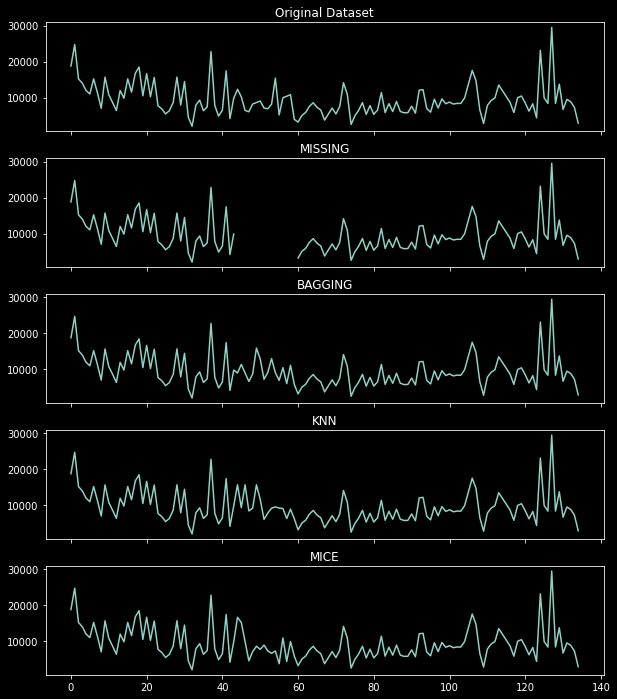

In [44]:
cols = ['clicks','bagging', 'knn', 'MICE']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

## Handling missing data with interpolation

Another commonly used technique for imputing missing values is interpolation. The
pandas library provides the DataFrame.interpolate() method for more complex
univariate imputation strategies.
For example, one of the interpolation methods available is linear interpolation. Linear
interpolation can be used to impute missing data by drawing a straight line between the
two points surrounding the missing value (in time series, this means for a missing data
point, it looks at a prior past value and the next future value to draw a line between them).
A polynomial interpolation, on the other hand, will attempt to draw a curved line between
the two points. Hence, each method will have a different mathematical operation to
determine how to fill in for the missing data.
The interpolation capabilities in pandas can be extended further through the SciPy
library, which offers additional univariate and multivariate interpolations.
In this recipe, you will use the pandas DataFrame.interpolate() function to
examine different interpolation methods, including linear, polynomial, quadratic, nearest,
and spline.

In [45]:
clicks_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_original.csv'
clicks_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/clicks_missing.csv'

co2_or_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_original.csv'
co2_ms_url = 'https://media.githubusercontent.com/media/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook./main/datasets/Ch7/co2_missing.csv'

co2_original = pd.read_csv(co2_or_url)
co2_missing = pd.read_csv(co2_ms_url)
clicks_original = pd.read_csv(clicks_or_url)
clicks_missing = pd.read_csv(clicks_ms_url)

In [46]:
interpolations = ['linear',
                    'quadratic',
                    'nearest',
                    'cubic']

In [47]:
for intp in interpolations:
    co2_missing[intp] = co2_missing['co2'].interpolate(method=intp)
    clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp)

In [48]:
co2_missing['spline'] = co2_missing['co2'].interpolate(method='spline',order=2)
clicks_missing['spline'] = clicks_missing['clicks'].interpolate(method='spline',order=2)
co2_missing['polynomial'] = co2_missing['co2'].interpolate(method='polynomial',order=5)
clicks_missing['polynomial'] = clicks_missing['clicks'].interpolate(method='polynomial',order=5)

In [49]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for linear: 0.0655664934619563
RMSE for quadratic: 0.09103266984784783
RMSE for nearest: 0.06429449494043808
RMSE for cubic: 0.09110245375484353
RMSE for spline: 0.18854769323970125
RMSE for polynomial: 0.07608509164316082


In [50]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626975
RMSE for nearest: 1706.1853705030173
RMSE for cubic: 6199.304875782831
RMSE for spline: 5222.922993448646
RMSE for polynomial: 56757.293236471276


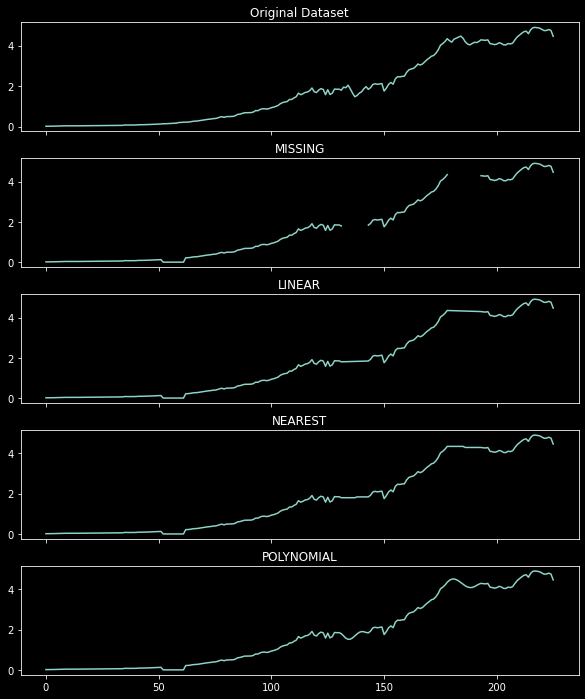

In [51]:
cols = ['co2', 'linear', 'nearest', 'polynomial']
plot_dfs(co2_original, co2_missing[cols], 'co2')

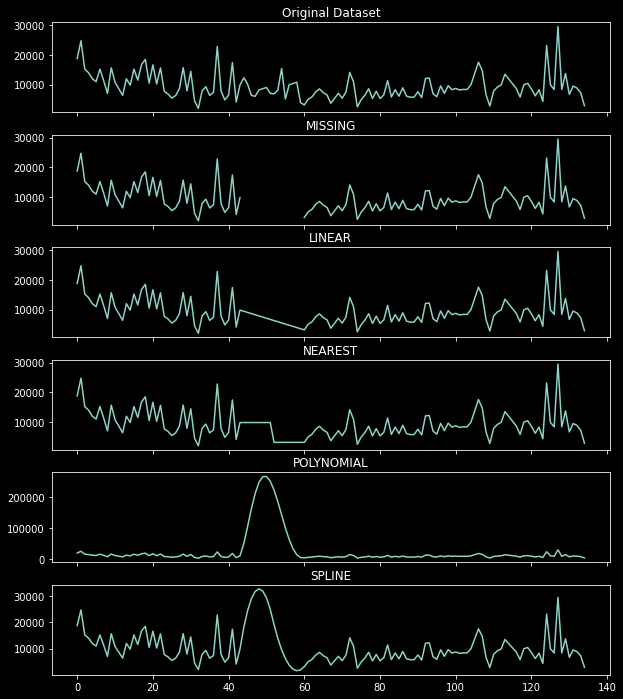

In [52]:
cols = ['clicks', 'linear', 'nearest', 'polynomial','spline']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')